In [ ]:
# Using jupyter for Data Analysis and Visualising.

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
#Statistics and Data Information
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [37]:
# Data Preprocessing
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

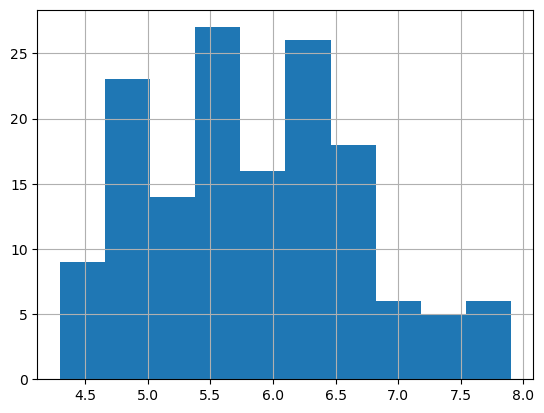

In [38]:
# Exploring Data Analysis
df['SepalLengthCm'].hist()

<Axes: >

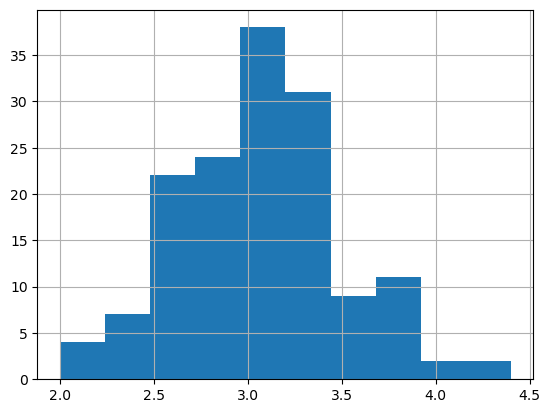

In [39]:
df['SepalWidthCm'].hist()

<Axes: >

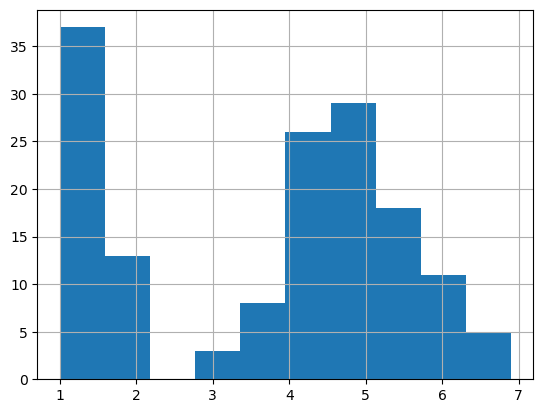

In [40]:
df['PetalLengthCm'].hist()

<Axes: >

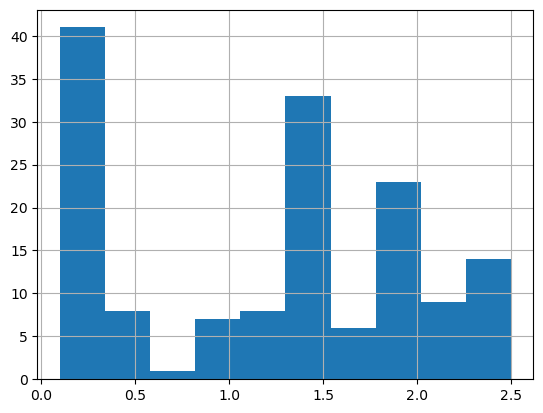

In [41]:
df['PetalWidthCm'].hist()

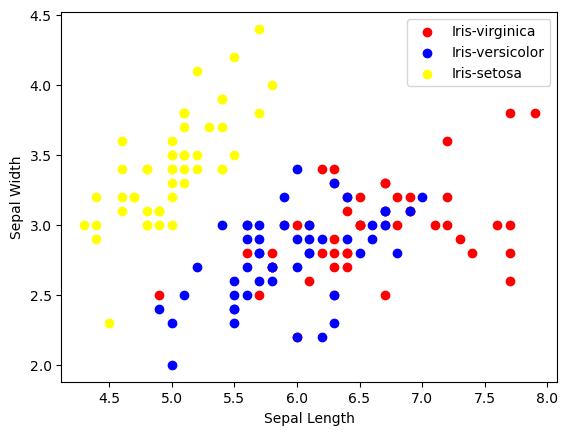

In [42]:
# Scatter Plot for Sepal
colours = ['red', 'blue', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colours[i], label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

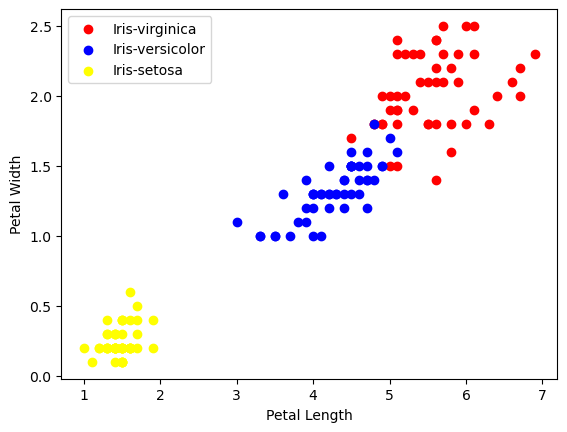

In [43]:
# Scatter Plot for Petal
colours = ['red', 'blue', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colours[i], label=species[i])
    
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

#This graph shows that it is easy to separate as the coloured clusters
#distinguishable.

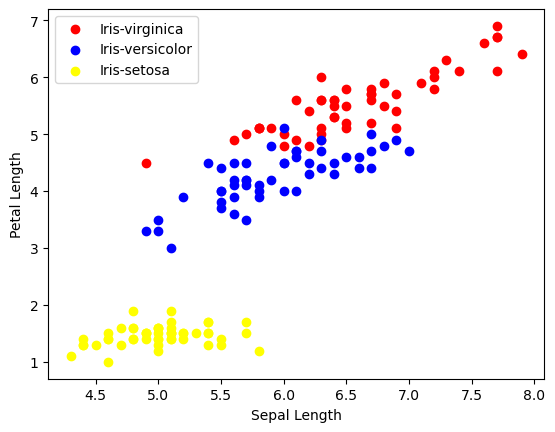

In [44]:
# Scatter Plot for Sepal and Petal Length
colours = ['red', 'blue', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colours[i], label=species[i])
    
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

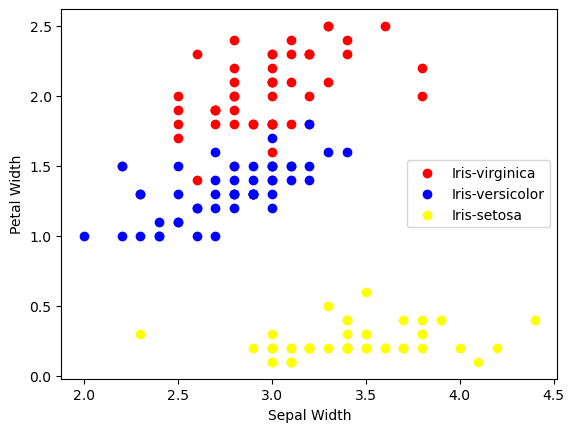

In [45]:
# Scatter Plot for Sepal and Petal Width
colours = ['red', 'blue', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colours[i], label=species[i])
    
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [47]:
# Correlation Matrix - showing correlation coefficients between variables.
# If two variables contain high correlation, we can ignore one variable from those two.

print(df.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [48]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<Axes: >

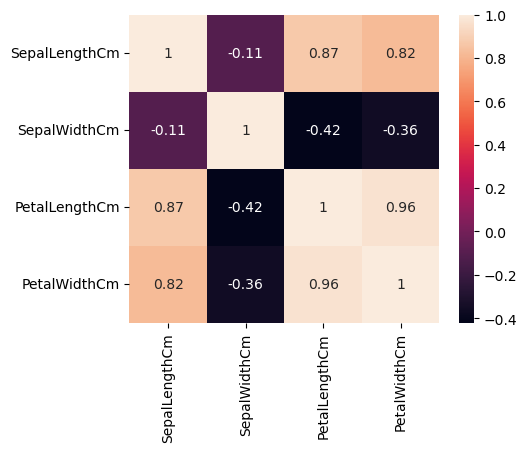

In [51]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, ax=ax)